## ECON323 Final Project 
### Jiayi Wu 49193634

# China's Urbanization and Economic Development in the Past 20 Years
China's urbanization is an important process affecting the world. 
Since the founding of China, the urban permanent population has increased from 170 million to 730 million, and the urbanization rate has increased from 17.9% to 63.89%. 
Rapid urbanization has propelled China's unprecedented economic and social transformation. More than 500 million people in China have been lifted out of poverty and the economy has achieved an average annual growth rate of 10%.

China's urbanization is dominated by the pursuit of GDP growth. In order to do that, local governments invest in infrastructure and development zones, which in turn attract enterprises and employment. The agglomeration of economic activities and population brings greater fiscal and tax revenue to local governments, therefore local governments have more funds and incentives to invest in infrastructure and development zones. This process forms a virtuous circle.

I will explore the development of China's urbanization in the past 20 years from the aspects of GDP, urban-rural population ratio, average income of urban-rural population, grain output, etc.

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

%matplotlib inline
colors = ['#a0eee1', '#ecad9e', '#66ccff', '#19caad', '#f4606c', '#bee7e9', '#b0c4de','#add8e6']

In [92]:
df = pd.read_csv("https://raw.githubusercontent.com/Jiayiyhy/Jiayiyhy/main/Chinas_Population_EnNew1.csv")
df.head(20)
# I found relevant data from multiple websites and integrated them together. The reference websites are:
# https://www.kaggle.com/datasets/concyclics/chinas-population-by-gender-and-urbanrural?select=Chinas+Population+En.csv
# https://www.statista.com/statistics/731246/china-structure-of-consumption-expenditure-per-capita/
# https://www.statista.com/statistics/1088173/china-urbanization-rate-by-region-province/
# https://data.stats.gov.cn/

,Unnamed: 0,At the end of the total population (ten thousand people),The male population (ten thousand people),Female population (ten thousand people),Urban population (ten thousand people),Rural population (ten thousand people),GDP(billion),urbanization rate,Grain output (ten thousand tons),The per capita grain(kg),urban per capita disposable income,rural per capita disposable income,Urban and rural income ratio
0,2020,141212,72357,68855,90220,50992,147727.31,63.89,66949.0,474.00,43834.0,17131.0,2.56
1,2019,141008,72039,68969,88426,52582,142799.37,60.00,66384.0,474.95,42359.0,16021.0,2.64
2,2018,140541,71864,68677,86433,54108,136051.28,59.58,65789.0,472.00,39251.0,14617.0,2.69
3,2017,140011,71650,68361,84343,55668,127666.85,58.52,66160.0,467.00,36396.0,13432.0,2.71
4,2016,139232,71307,67925,81924,57308,119486.96,57.35,61624.0,445.70,33616.0,12363.0,2.72
5,2015,138326,70857,67469,79302,59024,111994.63,56.10,62144.0,452.10,31195.0,11422.0,2.73
6,2014,137646,70522,67124,76738,60908,104765.60,54.77,60703.0,443.80,28844.0,10489.0,2.75
7,2013,136726,70063,66663,74502,62224,97640.15,53.73,60194.0,442.40,26955.0,8896.0,3.03
8,2012,135922,69660,66262,72175,63747,90610.89,52.57,58957.0,435.40,24565.0,7917.0,3.10
9,2011,134916,69161,65755,69927,64989,84010.78,51.27,57121.0,424.00,21810.0,6977.0,3.13


In [93]:
# Rename variables
df.rename(columns = {'Unnamed: 0':'year', 'At the end of the total population (ten thousand people)':'total'
                             , 'The male population (ten thousand people)':"male", 
                             "Female population (ten thousand people)":"female",
                             "Urban population (ten thousand people)":"urban",
                            "Rural population (ten thousand people)":"rural",
                            "GDP(billion)":"GDP",
                          "urbanization rate":"urbanrate",
                          "Grain output (ten thousand tons)":"Grain",
                          "The per capita grain(kg)":"grain",
                          "urban per capita disposable income":"uincome",
                          "rural per capita disposable income":"rincome",
                          "Urban and rural income ratio":"incomeratio"}, inplace = True)
df.head(21)


,year,total,male,female,urban,rural,GDP,urbanrate,Grain,grain,uincome,rincome,incomeratio
0,2020,141212,72357,68855,90220,50992,147727.31,63.89,66949.0,474.00,43834.0,17131.0,2.56
1,2019,141008,72039,68969,88426,52582,142799.37,60.00,66384.0,474.95,42359.0,16021.0,2.64
2,2018,140541,71864,68677,86433,54108,136051.28,59.58,65789.0,472.00,39251.0,14617.0,2.69
3,2017,140011,71650,68361,84343,55668,127666.85,58.52,66160.0,467.00,36396.0,13432.0,2.71
4,2016,139232,71307,67925,81924,57308,119486.96,57.35,61624.0,445.70,33616.0,12363.0,2.72
5,2015,138326,70857,67469,79302,59024,111994.63,56.10,62144.0,452.10,31195.0,11422.0,2.73
6,2014,137646,70522,67124,76738,60908,104765.60,54.77,60703.0,443.80,28844.0,10489.0,2.75
7,2013,136726,70063,66663,74502,62224,97640.15,53.73,60194.0,442.40,26955.0,8896.0,3.03
8,2012,135922,69660,66262,72175,63747,90610.89,52.57,58957.0,435.40,24565.0,7917.0,3.10
9,2011,134916,69161,65755,69927,64989,84010.78,51.27,57121.0,424.00,21810.0,6977.0,3.13


## 1. Observation and Visualization of Urbanization rate and GDP
### - China's GDP  growth path in the past 70 years
From being poor, being in vain, and waiting to be rebuilt, to becoming the second largest economy in the world with an economic aggregate exceeding 90 trillion yuan, China has created a development speed rarely seen in economic history in the past 70 years.


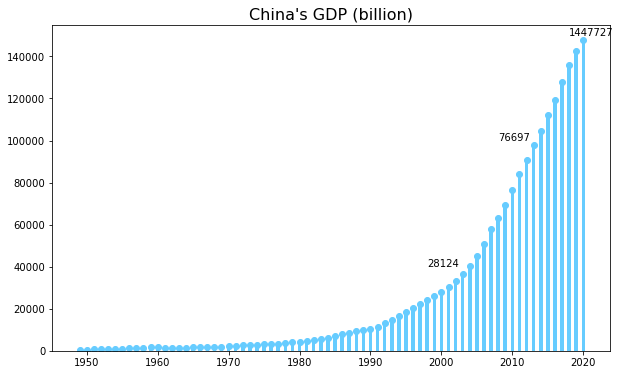

In [97]:
fig, ax = plt.subplots(1, figsize=(10, 6))
n = len(df)
plt.bar(df.year, df.GDP, color=colors[2], width=0.5)
plt.scatter(df.year, df.GDP, color=colors[2])
plt.title("China's GDP (billion)", loc="center", fontsize=16)
plt.annotate("28124", (2000, 28124.45), xytext=(1998, 40000))
plt.annotate("76697", (2010, 76696.65), xytext=(2008, 100000))
plt.annotate("1447727", (2020, 147727.31), xytext=(2018, 150000))
plt.show()

From the graph we can see that China's GDP has grown rapidly since 2000. China's GDP growth trend constitutes a typical hockey stick.

### - China's population growth path in the past 70 years
Since the founding of the People's Republic of China, China's population has grown from a high speed to a steady growth. The total population exceeded 1 billion in 1981, 1.3 billion in 2005, and 1.4 billion in 2019, more than doubling from the initial stage of the founding of the People's Republic of China.

We can observe the detailed change through histogram below.

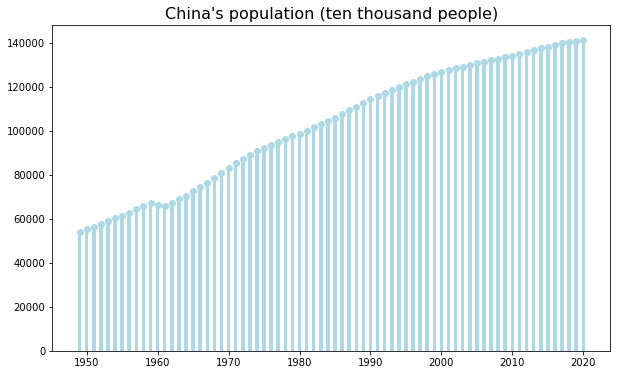

In [98]:
fig, ax = plt.subplots(1, figsize=(10, 6))
n = len(df)
plt.bar(df.year, df.total, color=colors[7], width=0.5)
plt.scatter(df.year, df.total, color=colors[7])
plt.title("China's population (ten thousand people)", loc="center", fontsize=16)
plt.show()

In recent years, the birth population in China has been declining due to the one-child policy implemented in the 1980s, which has reduced the population of childbearing age (other relative factors include, but are not limited to, increased life pressure and self-consciousness).

### - Change in the number of urban population and rural population

China is in the fastest period of urbanization, with the urbanization rate increasing at a rate of nearly 2% per year.The government plans to raise the urban population to about 900 million, accounting for 70 percent of the country's total population, within the next decade.

After the reform and opening up at the end of 1978, with the continuous economic construction and economic system reform, the growth of urban population began to accelerate, and the inflow of foreign capital created a large number of employment opportunities, resulting in the growth of urban population.

Compared with the 1960s and 1970s, the growth rate of the number of cities in mainland China increased significantly from 1980 to 1995, from 193 in 1978 to 622 in 1994, with an average increase of 33 cities per year.

By 1994, the urban population on the Chinese mainland had reached 343 million, and the urbanization level had reached 28.6 percent, 10.7 percent higher than in 1978.By 2000, the urban population had reached 456 million and the urbanization level had risen to 36.09 percent.

By 2016, the urbanization rate on the Chinese mainland had reached 57.35 percent, with more urban population than rural population.
(wikipedia)

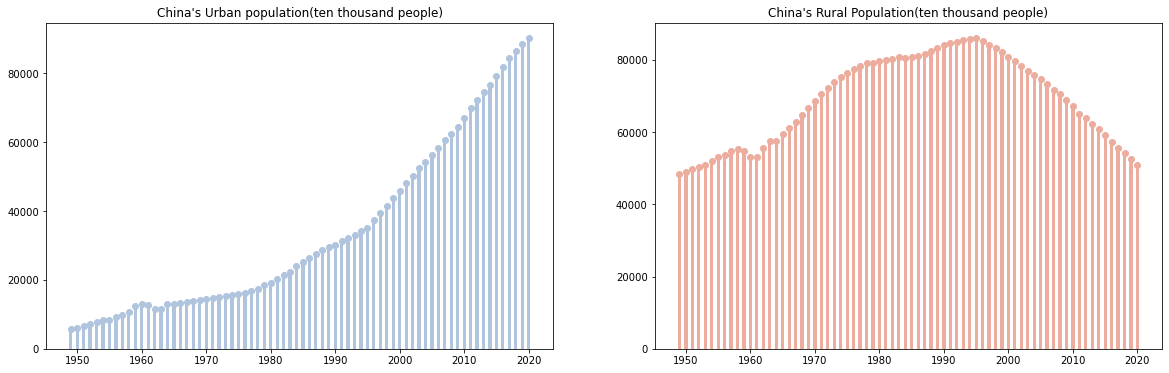

In [99]:
# Plot bar charts to see the change of rural and urben population in the past 70 years
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
n = len(df)

ax1.bar(df.year, df.urban, color=colors[6], width=0.5)
ax1.scatter(df.year, df.urban, color=colors[6])
ax1.title.set_text("China's Urban population(ten thousand people)")

ax2.bar(df.year, df.rural, color=colors[1], width=0.5,)
ax2.scatter(df.year, df.rural, color=colors[1],label="1")
ax2.title.set_text("China's Rural Population(ten thousand people)")

plt.show()


We can observe that since the founding of the People's Republic of China, the population of urban residents has increasing constantly.

The population of rural residents showed an upward trend from the beginning of the founding of the People's Republic of China to 1978, and the growth rate slowed down since 1978. Starting from 1996, rural population decreases rapidly.

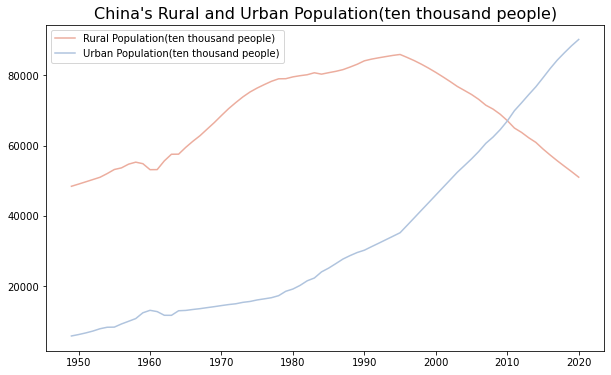

In [100]:
# Plot and observe how China's urban and rural populations changes over time
fig, ax = plt.subplots(1, figsize=(10, 6))
n = len(df)
plt.plot(df.year, df.rural, label = "Rural Population(ten thousand people)", color=colors[1])
plt.plot(df.year, df.urban, label = "Urban Population(ten thousand people)", color=colors[6])
plt.title("China's Rural and Urban Population(ten thousand people)", loc="center", fontsize=16)
plt.legend()
plt.show()


At about 2010, China's urban population exceeded rural population.

Then we can use pie charts to visually observe the changes in urban and rural population structure in the past 20 years.

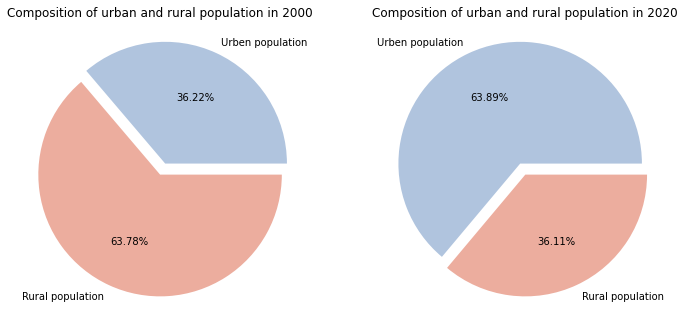

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
percentage = np.array([45906, 80837])
ax1.pie(percentage,
        labels=['Urben population', 'Rural population'], 
        colors=['#b0c4de','#ecad9e'], 
        autopct='%.2f%%', 
        explode=(0.1, 0)
       )
ax1.title.set_text("Composition of urban and rural population in 2000")
percentage = np.array([90220,50992])
ax2.pie(percentage,
        labels=['Urben population', 'Rural population'], 
        colors=['#b0c4de','#ecad9e'], 
        autopct='%.2f%%', 
        explode=(0.1, 0),
       )
ax2.title.set_text("Composition of urban and rural population in 2020")


In 2000, rural population occupied most of China's population.  
In 2020, the situation reversed and we can see that urban population occupies almost two third of China's population structure.  
China's proportion of urban population increased rapidly from 2000 to 2020.

## 2. Why Pursue Urbanization and How Urbanization Change People's Life
### - urban disposable income & rural disposable income
GDP per capita alone is not a good measure of the well-being of residents, so I use disposable income to measure resident's welfare instead.

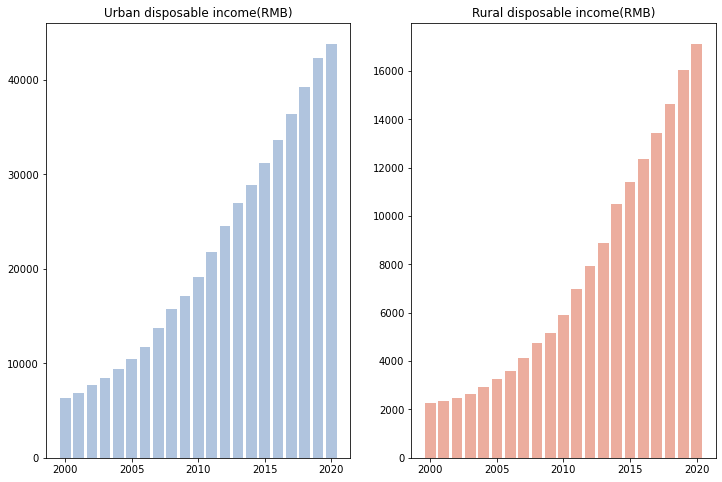

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.bar(df.year,df.uincome, color=colors[6])
ax1.title.set_text("Urban disposable income(RMB)") 
ax2.bar(df.year,df.rincome, color=colors[1])
ax2.title.set_text("Rural disposable income(RMB)") 

From 2000-2020, rural disposable income and urban disposable income all increases rapidly.   
Urban resident's disposable income increases from 6280 to 43834, rural resident's disposable income increases from 2253 to 17131. 
However, the income ration of urban and rural resident didn't change much (slightly decreases) and is near 2.5.  
We can use various charts to observe the difference of rural and urban resident's disposable income.

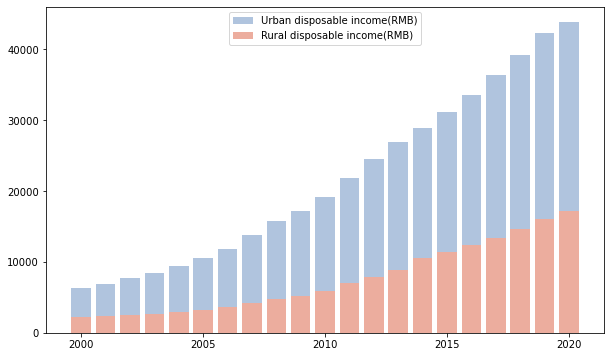

In [129]:
# superimpose two bar charts together and observe the difference of rural and urban resident's disposable income
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, figsize=(10, 6))
n = len(df)
plt.bar(df.year, df.uincome, label = "Urban disposable income(RMB)", color=colors[6])
plt.bar(df.year, df.rincome, label = "Rural disposable income(RMB)", color=colors[1])
plt.legend()
plt.show()


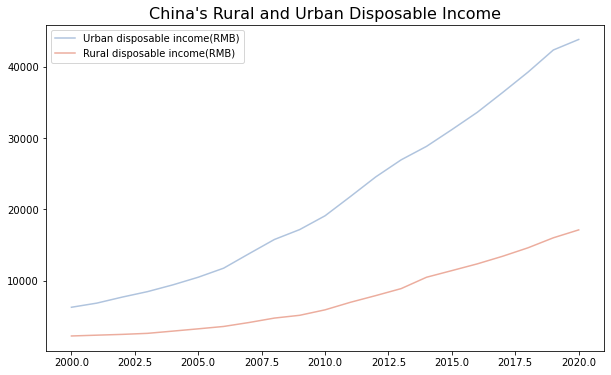

In [26]:
# plot and observe how rural and urban resident's disposable income change over time
fig, ax = plt.subplots(1, figsize=(10, 6))
n = len(df)
plt.plot(df.year, df.uincome, label = "Urban disposable income(RMB)", color=colors[6])
plt.plot(df.year, df.rincome, label = "Rural disposable income(RMB)", color=colors[1])
plt.title("China's Rural and Urban Disposable Income", loc="center", fontsize=16)
plt.legend()
plt.show()


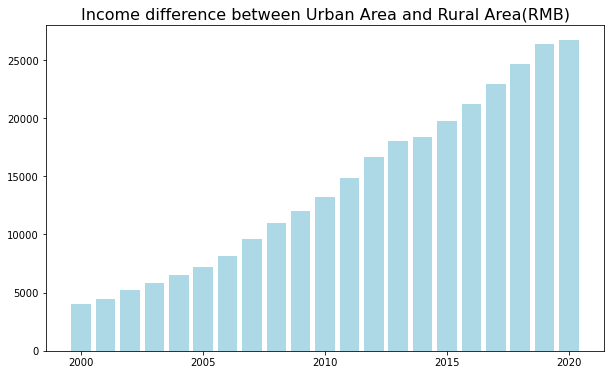

In [39]:
# Plot and observe the difference of rural and urban resident's disposable income
fig, ax = plt.subplots(1, figsize=(10, 6))
n = len(df)
df["Diff"]=df["uincome"]-df["rincome"]
plt.bar(df.year, df.Diff, color=colors[7])
plt.title("Income difference between Urban Area and Rural Area(RMB)",loc="center", fontsize=16)
plt.show()

In the past 20 years, the per capita disposable income of China's urban population has been much higher than that of the rural population.   
Note: because of inflation, growth in real term will be smaller than growth in nominal term.

## 3. How Urbanization Rate Interact with GDP
### - Observing Provincial GDP and urbanization rate
I want to observe how urbanization rate interact with GDP.    
To do this, I get data of China's 31 provinces' provincial GDP and urbanization rate, then observe how they relate with each other using simple linear regression model.

In [73]:
# Import data of provnetial GDP and urbanization rate.
df3 = pd.read_csv("https://raw.githubusercontent.com/Jiayiyhy/Jiayiyhy/main/GDP%20%26%20urbanlization.csv",header=0,index_col=False)
df3.head(31)
#Source: http://www.stats.gov.cn/tjsj/ndsj/2021/indexeh.htm

,Province,GDP,Urbanization Rate
0,Beijing,164889,87.55
1,Shanghai,155768,89.30
2,jiangsu,121231,73.44
3,Fujian,105818,68.75
4,Tianjin,101614,84.70
5,Zhejiang,100620,72.17
6,Guangdong,88210,74.15
7,Chongqing,78170,69.46
8,Hubei,74440,62.89
9,Shandong,72151,63.05


Plot interactive charts showing each province's provincial GDP and urbanization rate.

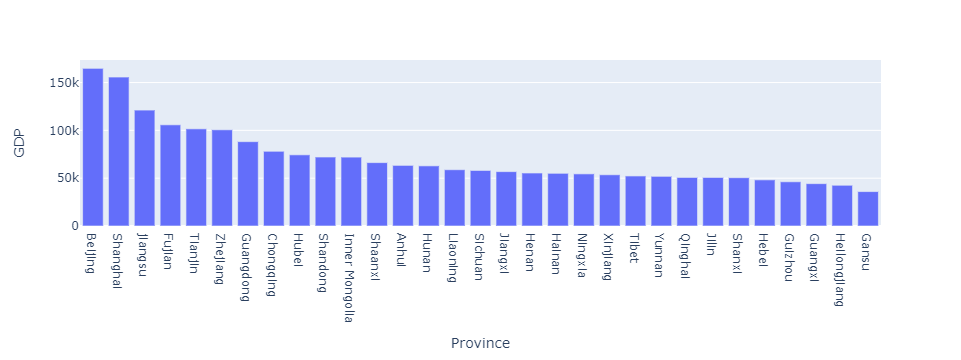

In [74]:
import plotly.express as px
PGDP=px.bar(df3,x="Province",y="GDP")
PGDP

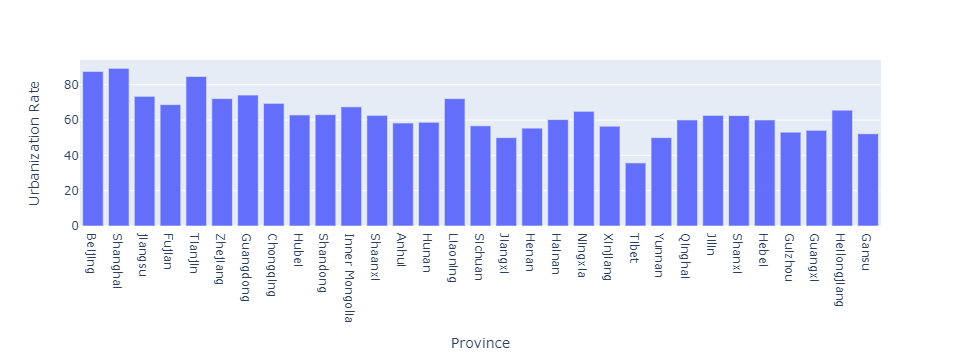

In [75]:
PUR=px.bar(df3,x="Province",y="Urbanization Rate")
PUR

With provincial data, we can use simple regression model to show the linear relationship between GDP and urbanization rate.    
However, simple linear regression is not a very good model here, because there are few data and only one independent variable, the prediction accuracy is relatively low.   
We can observe the raw relationship between urbanization rate and GDP.

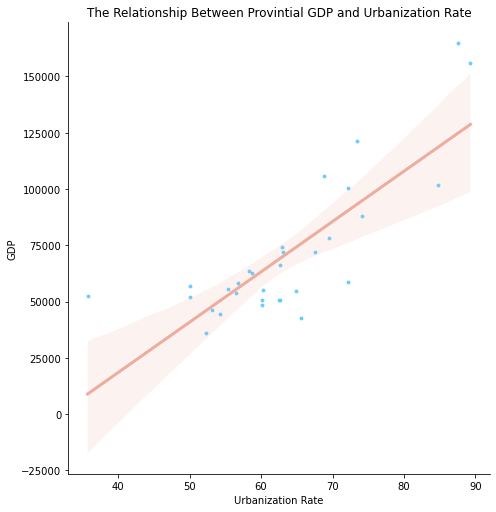

In [90]:
import seaborn as sns
sns.lmplot(data=df3,x="Urbanization Rate", y="GDP", height=7, scatter_kws = dict(s=8, alpha=1, color = colors[2]),
          line_kws={"color":colors[1],"alpha":1,"lw":3}).set(title="The Relationship Between Provintial GDP and Urbanization Rate")


By this simple linear regression model, we can observe that there has a positive relationship between provincial urbanization rate and GDP.    
Therefore, the urbanization rate and GDP are positively related. 

## 4. How Urbanization Changes People's life
### - Different Proportion of consumption between Urban and Rural Households

In [102]:
# Here, I import another set of data showing the proportion of money spent in different categories by urban and rural population. 
# Source: https://www.statista.com/statistics/731246/china-structure-of-consumption-expenditure-per-capita/
df4 = pd.read_csv("https://raw.githubusercontent.com/Jiayiyhy/Jiayiyhy/main/CS%20distribution.csv",header=0,index_col=False)
df4.head(10)
# Here are full names of caregories under Varities
# ftl: Food, tobacco and liquor
# res: Residence
# tc: Transport and communication
# ecr: Education,culture and recreation
# hms: Health care and medical services
# cf: Clothing and footwear
# hfas: Household facilities, articles and services
# mgs: Miscellaneous goods and services

,Varities,Urban Households(%),Rural Households(%)
0,ftl,28.6,32.7
1,res,24.4,20.8
2,tc,13.0,13.4
3,ecr,11.0,10.3
4,hms,8.3,9.9
5,cf,6.1,5.4
6,hfas,6.0,5.7
7,mgs,2.6,1.8


This data shows the consumption proportion of different goods, and we can observe the difference of proportion between rural and urban households.

In [103]:
df4.rename(columns = {'Varities':'vt','Urban Households(%)':'uhouse', 'Rural Households(%)':'rhouse'}, inplace = True)
df4.head(10)

,vt,uhouse,rhouse
0,ftl,28.6,32.7
1,res,24.4,20.8
2,tc,13.0,13.4
3,ecr,11.0,10.3
4,hms,8.3,9.9
5,cf,6.1,5.4
6,hfas,6.0,5.7
7,mgs,2.6,1.8


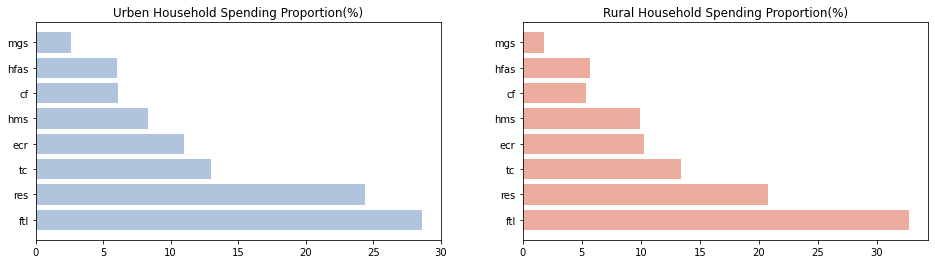

In [104]:
VT = ("ftl", "res", "tc", "ecr", "hms", "cf", "hfas", "mgs")
# "Food, tobacco and liquor", "Residence", "Transport and communication", "Education,culture and recreation"  
# "Health care and medical services", "Clothing and footwear", "Household facilities, articles and services",
# "Miscellaneous goods and services")
uhouse = [28.6, 24.4, 13, 11, 8.3, 6.1, 6, 2.6]
rhouse = [32.7, 20.8, 13.4, 10.3, 9.9, 5.4, 5.7, 1.8]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.barh(VT, uhouse, color=colors[6])
ax1.title.set_text("Urben Household Spending Proportion(%)") 
ax2.barh(VT, rhouse, color=colors[1])
ax2.title.set_text("Rural Household Spending Proportion(%)") 

<BarContainer object of 8 artists>

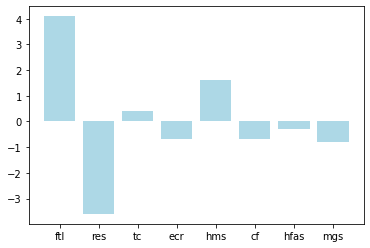

In [105]:
df4["Diff"]= df4["rhouse"].astype(float)-df4["uhouse"].astype(float)
plt.bar(VT, df4.Diff, color=colors[7])

Rural households spend more on:   
- Food, tobacco and liquor
- Transport and communication
- Health care and medical services

Urban households spend more on:    
- Residence
- Education,culture and recreation
- Clothing and footwear
- Household facilities, articles and services
- Miscellaneous goods and services

From the graph we can see rural households will cost more than urban households on basic living needs like food, health care, and transportation.     
This also reflected the different living environment between rural life and urban life. Usually, urban life will be more convenient and cheaper.

# Conclusion

To conclude, by analyzing the population data of China, we find that urbanization has become a important trend in China.    
Then I use income data of rural and urban area to discuss that the difference of disposable income between rural area and urban area has becoming larger and larger.     
After that,  I collected the urbanization data and GDP data of provinces in China and fit a linear regression to find out the relationship between urbanization and GDP, and the results shows that GDP is positively related to urbanization rate.     
In the end, the data of expenditure proportion shows the difference of living style and living environment between rural and urban areas. 

reference: 
https://zh.wikipedia.org/w/index.php?title=%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E5%9F%8E%E5%B8%82%E5%8C%96&oldid=70000098

https://www.statista.com/statistics/731246/china-structure-of-consumption-expenditure-per-capita/

http://www.stats.gov.cn/tjsj/ndsj/2021/indexeh.htm

https://www.kaggle.com/datasets/concyclics/chinas-population-by-gender-and-urbanrural?select=Chinas+Population+En.csv

https://www.statista.com/statistics/731246/china-structure-of-consumption-expenditure-per-capita/

https://www.statista.com/statistics/1088173/china-urbanization-rate-by-region-province/

https://data.stats.gov.cn/